# Tutorial 4: Measuring Space

[todo] About scalar fields in 2d and 3d. Eg in 3d the temperature of solid body, density of matter inside the brain. In 2d the atmospheric air pressure across a region. Can measure or calculate - and investigate by taking slices. Could be physical space, or time, or even parameters in another model.



Suppose we have a 2-dimensional scalar field given by the following formula, which describes the height of a hemisphere embedded in a 2d-plane.

$$
\begin{align}
  f(x, y) = 
  \begin{cases}
    \sqrt{R^2-\left(x^2+y^2\right)} & \text{if } x^2 + y^2 < R^2 \\
    0 & \text{otherwise }
  \end{cases}
\end{align}
$$

## Question 1

**Complete the function `sphere_height(x_pos, y_pos, radius)` so that it returns the correct value of the function $f$.**

**Check the two tests work and write a third test with values of `x_pos`, `y_pos`, and `radius` of your choice.**


In [36]:
import numpy as np

def sphere_height(x_pos, y_pos, radius):
    val = 0 # replace this line with your code!
    
    w = radius**2-(x_pos**2+y_pos**2)
    if w < 0:
        val = 0
    else:
        val = np.sqrt(w)
    
    return val

h = sphere_height(0, 0, 1)
print(h) # should print 1
h = sphere_height(1, 1, 1)
print(h) # should print 0

1.0
0


Next we will create a 2-dimensional array to store the value of the function across a range of values of $x$ and $y$.

First let's create a length 10 array and 

## Question 2

**Complete the following code so that it creates a $6$ by $6$ array containing the sphere height in the range $-12 < x < 12$ and $-12 < y < 12$.**

Hints: [TODO]
 - change the `sphere` array from `N` by `1` rather than `N` by `N`
 - create an array `y_array` to store the range of $y$ values
 - Add another loop - you will have two loops, one nested inside the other


In [37]:
R = 10
N = 6

sphere = np.zeros((N, 1))

x_array = np.linspace(-12, 12, N)
print("x_array:", x_array)

for i in range(N):
    x = x_array[i]
    sphere[i,0] = sphere_height(x, 0, R)
    
print("sphere:\n", sphere)

x_array: [-12.   -7.2  -2.4   2.4   7.2  12. ]
sphere:
 [[0.        ]
 [6.93974063]
 [9.70772888]
 [9.70772888]
 [6.93974063]
 [0.        ]]


In [44]:
R = 10
N = 6


sphere = np.zeros((N, N))

x_array = np.linspace(-12, 12, N)
print("x_array:", x_array)
                  
y_array = np.linspace(-12, 12, N)
print("y_array:", y_array)

for i in range(N):
    for j in range(N):
        x = x_array[i]
        y = y_array[j]
                  
        sphere[i,j] = sphere_height(x, y, R)
    
print("sphere:\n", sphere)

x_array: [-12.   -7.2  -2.4   2.4   7.2  12. ]
y_array: [-12.   -7.2  -2.4   2.4   7.2  12. ]
sphere:
 [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         6.51152824 6.51152824 0.         0.        ]
 [0.         6.51152824 9.40638081 9.40638081 6.51152824 0.        ]
 [0.         6.51152824 9.40638081 9.40638081 6.51152824 0.        ]
 [0.         0.         6.51152824 6.51152824 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


We'd like to visualise the values of the array. One way to do this is with a 'heat map' - an image whose pixels represent the value of each element of the array. The `matplotlib` function `imshow` will do this for us.

## Question 3

**Use the `matplotlib` function `imshow` to generate a heat map of the array**

**Experiment with different values of  `N` until you get a nice smooth image. What happens if you change the value of `R`?**


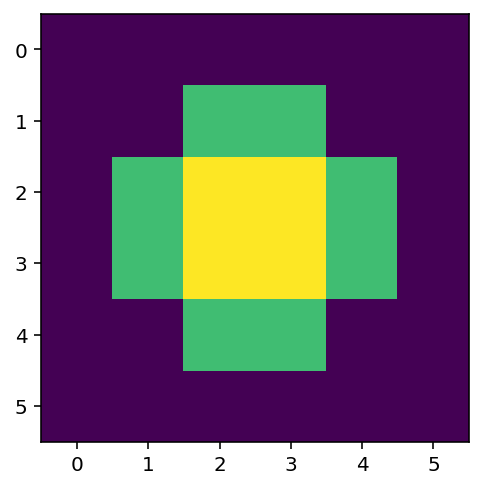

In [45]:
plt.imshow(sphere)


In [29]:
R = 10
N = 6

sphere = np.zeros((N, N))

x_array = np.linspace(-12, 12, N)
print("x_array:", x_array)

y_array = np.linspace(-12, 12, N)
print("y_array:", x_array)

for j in range(N):
    for i in range(N):
        x = x_array[i]
        y = y_array[j]
        sphere[i,j] = sphere_height(x, y, R)
    
print("sphere:\n", sphere)

x_array: [-12.   -7.2  -2.4   2.4   7.2  12. ]
y_array: [-12.   -7.2  -2.4   2.4   7.2  12. ]
sphere:
 [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         6.51152824 6.51152824 0.         0.        ]
 [0.         6.51152824 9.40638081 9.40638081 6.51152824 0.        ]
 [0.         6.51152824 9.40638081 9.40638081 6.51152824 0.        ]
 [0.         0.         6.51152824 6.51152824 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


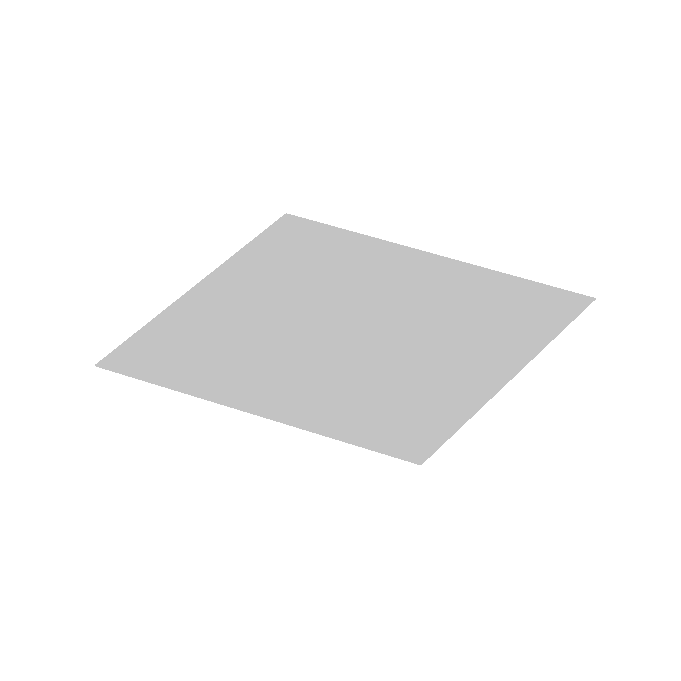

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 10
w = 1
N = 500

x_array = np.linspace(-2*R, 2*R, N)
y_array = np.linspace(-2*R, 2*R, N)

sphere = np.zeros((N, N))
    
for i in range(N):
    for j in range(N):
        x = x_array[i]
        y = y_array[j]
        sphere[i,j] = sphere_height(x, y, R)
        
        

# plt.figure(figsize=(6,6))
# plt.imshow(sphere)
        
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(x_array, y_array)
ax = plt.axes(projection='3d')
ax.set_axis_off()
# ax.plot_surface(X, Y, sphere,  rstride=1, cstride=1,
#                 cmap='gray', edgecolor='none')


# surf = ax.plot_surface(X, Y, sphere, cmap='gray',
#                        linewidth=0, antialiased=False, rcount=200, ccount=200)

# Get lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Get colormaps to use with lighting object.
from matplotlib import cm

# Create an instance of a LightSource and use it to illuminate the surface.
light = LightSource(90, 45)
rgb = np.ones((sphere.shape[0], sphere.shape[1], 3))
illuminated_surface = light.shade_rgb(rgb, sphere)

ax.plot_surface(X, Y, sphere, rstride=1, cstride=1, linewidth=0, antialiased=False,
                facecolors=illuminated_surface)
ere_height

In [10]:
sphere_height(-3, -3, 10)

/tmp/ipykernel_4096/3062361008.py:5: RuntimeWarning: invalid value encountered in sqrt
  val = np.sqrt(radius - (x_pos**2 + y_pos**2))


nan

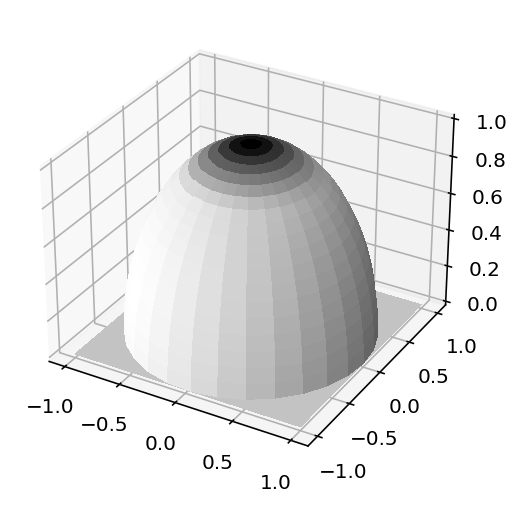

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Get colormaps to use with lighting object.
from matplotlib import cm

# Create an instance of a LightSource and use it to illuminate the surface.
#light = LightSource(90, 45)
light = LightSource(90, 45)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi/2:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)

rgb = np.ones((z.shape[0], z.shape[1], 3))
illuminated_surface = light.shade_rgb(rgb, z)

ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, antialiased=False,
                 facecolors=illuminated_surface)

N = 10
R = 1
x_array = np.linspace(-R, R, N)
y_array = np.linspace(-R, R, N)

X, Y = np.meshgrid(x_array, y_array)

Z = np.zeros((N, N))


rgb = np.ones((Z.shape[0], Z.shape[1], 3))
illuminated_surface = light.shade_rgb(rgb, Z)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False,
                facecolors=illuminated_surface)